# Orthgonal Chirp


In [12]:
%matplotlib inline
%run signal.py

In [52]:
F0 = 16000
F1 = 19000
AMPLITUDE=20000

st = Signal(f0=F0, f1=F1, fs=44100, T=0.0205, A=AMPLITUDE)
sr = Signal(f0=F0, f1=F1, fs=100000, T=0.0205, A=AMPLITUDE)

## Baseband signal

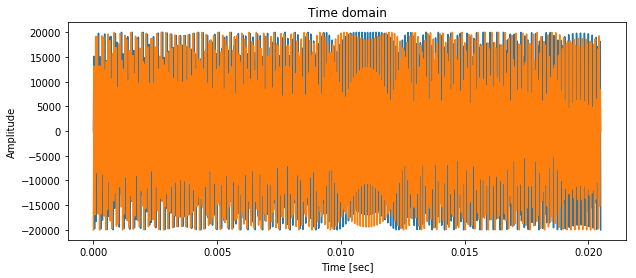

In [53]:
st.plot_wave(st.chirp())

## Orthogonal chirp

Frequencies at peaks: [-18683.96017699 -16342.36725664  16342.36725664  18683.96017699] Hz


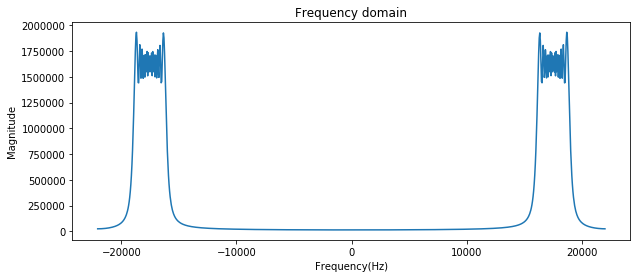

In [63]:
# Signal transmitted by the transmitter
Ccos = real(st.chirp())
Csin = imag(st.chirp())
W = Ccos + Csin
st.plot_fft(W)

## Receiving the signal

Frequencies at peaks: [-18682.92682927 -16341.46341463  16341.46341463  18682.92682927] Hz


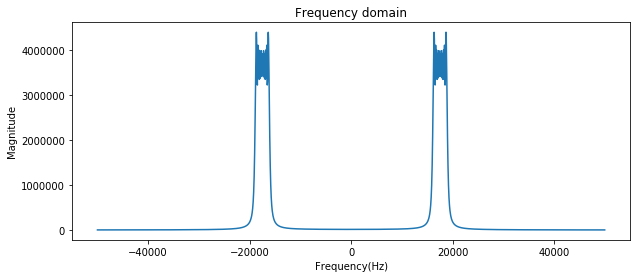

In [64]:
# Signal recived by the receiver
Ccos = real(sr.chirp())
Csin = imag(sr.chirp())
W = Ccos + Csin
sr.plot_fft(W)

## Demodulation under noise

Frequencies at peaks: [0.] Hz


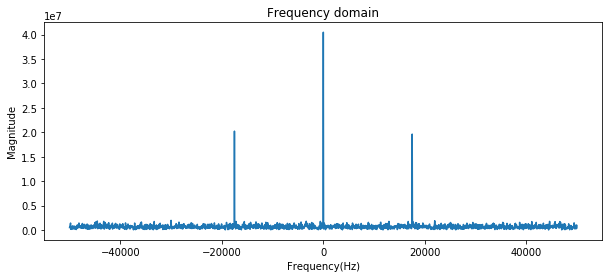

In [65]:
# Noise
noise = sr.white_noise(A=AMPLITUDE) + \
    sr.constant_noise(f=0, A=AMPLITUDE) + \
    sr.constant_noise(f=F0+(F1-F0)/2, A=AMPLITUDE)
sr.plot_fft(noise)

In [66]:
Ru = W * sr.chirp(updown="up")
Rd = W * sr.chirp(updown="down")
Ru_n = (W + noise) * sr.chirp(updown="up")
Rd_n = (W + noise) * sr.chirp(updown="down")

Frequencies at peaks: [0.] Hz


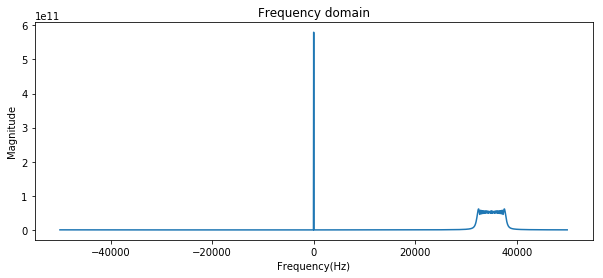

In [67]:
# Without noise
sr.plot_fft(Ru)

Frequencies at peaks: [35024.3902439] Hz


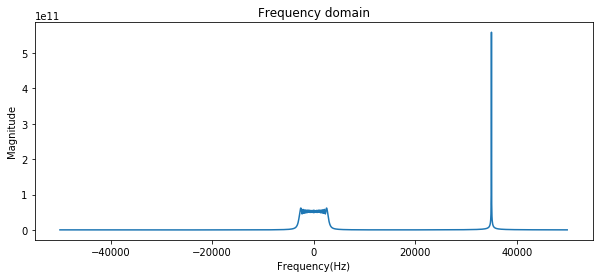

In [68]:
# Without noise
sr.plot_fft(Rd)

Frequencies at peaks: [0.] Hz


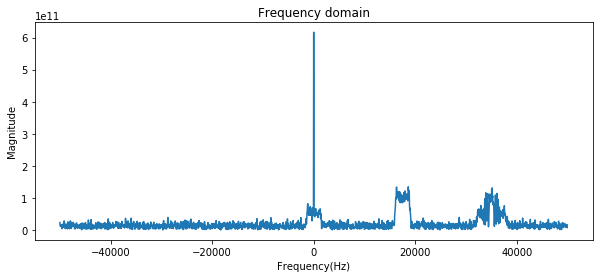

In [69]:
# With noise
sr.plot_fft(Ru_n)

Frequencies at peaks: [35024.3902439] Hz


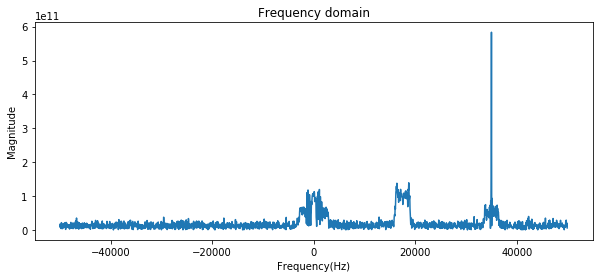

In [71]:
# With noise
sr.plot_fft(Rd_n)